# Weighted Nonlinear Fit
*March 18, 2021*

In this Jupyter notebook we will fit a nonlinear function to a set of experimental data.  The fit will be weighted by the measurement uncertainties.

In this example, we take data from a series $LRC$ circuit.  For the $y$-axis we will have the ratio of the magntidue of the voltage across the resistance to that supplied by the function generator driving the circuit ($V_\mathrm{ratio}=V_R/V_0$).  On the x-axis we will have angular frequency $\omega$.

The process will be very similar to the process used to fit a linear function to a dataset.  The main difference will be in the definition of the model function that we are fitting to.

- First, import the *NumPy*, *Matplotlib*, & *SciPy* modules.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

- Next, enter the data (frequency and $V_\mathrm{ratio}\pm\Delta v_\mathrm{ratio}$) as arrays.

In [17]:
Vratio= np.array([0.198e-1, 0.67e-1, .117, .185, .331, .450, .573, .689, .718,\
                  .714, .704, .670, .631, .549, .412, .318, .249, .186, .138])
errVratio= np.array([0.1e-2, 0.2e-2, 0.3e-2, 0.3e-2, 0.5e-2, 0.6e-2, 0.7e-2,\
                     0.8e-2, 0.8e-2, 0.8e-2, 0.8e-2, 0.8e-2, 0.8e-2, 0.7e-2,\
                     0.6e-2, 0.4e-2, 0.5e-2, 0.3e-2, 0.3e-2])
f = np.array([3000, 10000, 15000, 20000, 25000, 28000, 30000, 32000, 33000,\
              34000, 35000, 36000, 37000, 39000, 43000, 47000, 52000, 60000,\
              70000])

- Calculate the angular frequency $\omega$.

In [18]:
omega = (2*np.pi*f)

- Plot the data using *errorbar(x, y, e)*.

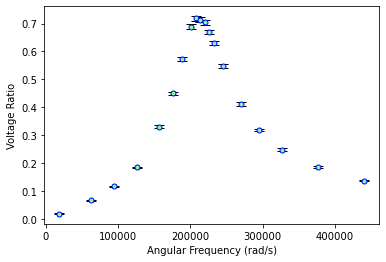

In [19]:
plt.errorbar(omega, Vratio, errVratio, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                 markeredgecolor = 'b',\
                 markerfacecolor = (.49, 1, .63),\
                 capsize = 5)
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Voltage Ratio');

To do the actual fit, we will use the *curve_fit()* function from the *SciPy* module.  This way of fitting is very nice because we use it for all types of fit models (linear, polynomial, linear-in-parameter fits, and nonlinear fits).  It is capable of doing both unweighted and weighted fits and it will return uncertainties in the fit parameters via the covariance matrix.

The first step is to define a function for the model that we will fit our data to.  In this case, the model is a Lorentzian:<br>

$V_\mathrm{ratio}=\frac{A}{\sqrt{1+\left(\dfrac{\omega}{\gamma}\right)^2\left[1-\left(\dfrac{\omega_0}{\omega}\right)^2\right]^2}}$<br>

 > $\omega_0$ is the resonance frequency<br>
 $A$ is the amplitude (height of the resonance peak)<br>
 $\gamma$ is the width of the resonance<br>
 $\omega$ is the independent variable along the horizontal axis (angular frequency in this case)
 
- Here's how the function is defined.  For $\gamma$ we used "width" and for the independent variable, we used "x".

In [20]:
def LRCFunc(x, A, width, w0):
    y = A/np.sqrt(1+(x/width)**2*(1-(w0/x)**2)**2)
    return y

Here is the actual command to execute the fit.  At a minimum, *curve_fit()* requires as inputs the function that defines the model, the *x*-data, and the *y*-data.  The statement below tells *curve_fit()* to return a list of the best-fit parameters and the covariance matrix which will be used to determine the error in the fit parameters.

To give the fit a chance at being successful, we have to provide reasonable initial guesses for the fit parameters.  We use the option "p0" for the list of starting parameters.  The order must be the same as the order of the parameters defined in the function "LRCFunc()".

In [21]:
start = (0.7, 0.5e5, 2e5)
a_fit, cov = curve_fit(LRCFunc, omega, Vratio, p0 = start)

- Here is the output of the *curve_fit()* function.

In [22]:
print('The best-fit parameters are:\n A =', a_fit[0], '\n',\
      'width =', a_fit[1], '1/s\n',\
      'w0 =', a_fit[2], '1/s')

The best-fit parameters are:
 A = 0.7217437152596441 
 width = 68024.56300087317 1/s
 w0 = 213256.0968196423 1/s


The uncertainties of the best-fit parameters are determined from the square roots of the diagonal elements of the covariance matrix.  

We can select the diagonal elements using:
> np.diag()[0] for the (0,0) element<br>
np.diag()[1] for the (1,1) element<br>
np.diag()[2] for the (2,2) element

Note the use of the unicode character \u0394 to print $\Delta$.

In [23]:
print('The errors in the parameters are:\n \u0394A =', np.sqrt(np.diag(cov))[0],\
      '\n', '\u0394width =', np.sqrt(np.diag(cov))[1], '1/s'\
      '\n', '\u0394w0 =', np.sqrt(np.diag(cov))[2], '1/s')

The errors in the parameters are:
 ΔA = 0.0037048186479549886 
 Δwidth = 952.8034010325724 1/s
 Δw0 = 377.8379936633329 1/s


We can now report:

>$A = 0.722\pm 0.004$<br>
$\gamma=68000\pm 1000~\mathrm{s}^{-1}$<br>
$\omega_0=213300\pm 400~\mathrm{s}^{-1}$

- Next, use the function that we defined to generate the best-fit curve and plot it on top of the data.

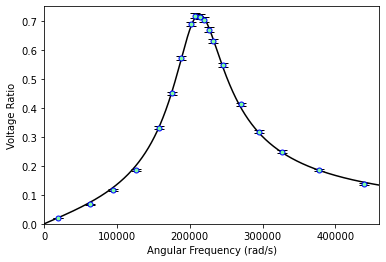

In [24]:
# First, plot the data again.
plt.errorbar(omega, Vratio, errVratio, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                 markeredgecolor = 'b',\
                 markerfacecolor = (.49, 1, .63),\
                 capsize = 5)
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Voltage Ratio');

# Here are some anagular frequency points that will passed to our fit model.
xx = np.arange(1, 8e5, 100)

# Here is the plot of the best-fit function.
plt.plot(xx, LRCFunc(xx, a_fit[0], a_fit[1], a_fit[2]), 'k-')
plt.axis((0, 4.6e5, 0, 0.75));

All of this has produced an "unweighted" fit to the data.  To include weights, all we need to do is include another option in *curve_fit()*. Everything else is exactly the same!  

The new option is "sigma" and it is simply a list of the errors in the y-values ($\Delta V_\mathrm{ratio}$ in the case of this example).  Note that many fitting routines require you to provide the actual weights as $1/\sigma^2$.  That is not the case here.  You just have to provide the absolute $y$-uncertainties. We will also specify that the errors are absolute errors with the option "absolute_sigma=True".

- Here's the command to execute the weighted fit.

In [25]:
a_fit, cov = curve_fit(LRCFunc, omega, Vratio, sigma = errVratio,\
                       p0 = start, absolute_sigma = True)

- Extract the fit parameters and their uncertainties.

In [26]:
print('The best-fit parameters are:\
      \n A \u00B1 \u0394A =', a_fit[0], '\u00B1', np.sqrt(np.diag(cov))[0],\
     '\n width \u00B1 \u0394width =', a_fit[1], '\u00B1', np.sqrt(np.diag(cov))[1], '1/s'\
     '\n w0 \u00B1 \u0394w0 =', a_fit[2], '\u00B1', np.sqrt(np.diag(cov))[2], '1/s')

The best-fit parameters are:      
 A ± ΔA = 0.7243152456809248 ± 0.003647934113877031 
 width ± Δwidth = 66816.88081227308 ± 623.0614968262379 1/s
 w0 ± Δw0 = 213875.00919865974 ± 310.60920671532733 1/s


We can now report:

>$A = 0.724\pm 0.004$<br>
$\gamma=66800\pm 600~\mathrm{s}^{-1}$<br>
$\omega_0=213900\pm 300~\mathrm{s}^{-1}$

- Plot the data and the best-fit curve.

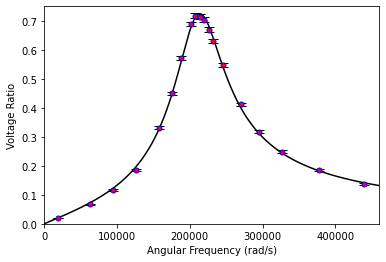

In [27]:
# Here's the data.
plt.errorbar(omega, Vratio, errVratio, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                 markeredgecolor = 'b',\
                 markerfacecolor = 'r',\
                 capsize = 5)
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Voltage Ratio')

# Plot the best-fit line.
xx = np.arange(1, 8e5, 100)
plt.plot(xx, LRCFunc(xx, a_fit[0], a_fit[1], a_fit[2]), 'k-')
plt.axis((0, 4.6e5, 0, 0.75));